<a href="https://colab.research.google.com/github/xwang12/AI_391l_machine_learning_fall_2025/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [17]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [8]:
import pandas as pd
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [9]:
df['mean radius']

,mean radius
0,17.99
1,20.57
2,19.69
3,11.42
4,20.29
...,...
564,21.56
565,20.13
566,16.60
567,20.60


In [11]:
df[99:100]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
99,14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.0639,...,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353


In [12]:
df.iloc[99]

,99
mean radius,14.420000
mean texture,19.770000
mean perimeter,94.480000
mean area,642.500000
mean smoothness,0.097520
mean compactness,0.114100
mean concavity,0.093880
mean concave points,0.058390
mean symmetry,0.187900
mean fractal dimension,0.063900


In [15]:
# How many rows and columns are there in this data set? What do the rows and columns represent?
rows, columns = df.shape
print (f"Rows: {rows}")
print (f"Cols: {columns}")
print ("Each row represents a patient/case.")
print ("Each column represents a feature of the cancer.")

Rows: 569
Cols: 30
Each row represents a patient/case.
Each column represents a feature of the cancer.


In [18]:
# How many malignant cases are there in total?
df['label'] = cancer.target
count = (df['label'] == 0).sum()
print(f"Total malignant cases: {count}")

Total malignant cases: 212


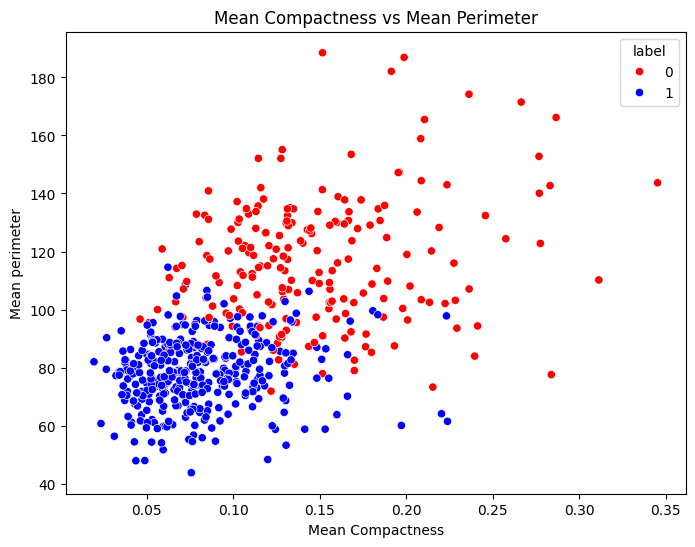

In [19]:
# Make a scatterplot of 'mean compactness' and 'mean perimeter'. Try to color the points by their label (i.e. malignant or benign).
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6)) #Default matplotlib size is usually (6.4, 4.8) inches
sns.scatterplot(
    x='mean compactness',
    y='mean perimeter',
    hue='label',
    data=df,
    palette={0: 'red', 1: 'blue'}
)
plt.title("Mean Compactness vs Mean Perimeter")
plt.xlabel("Mean Compactness")
plt.ylabel("Mean perimeter")
plt.show()

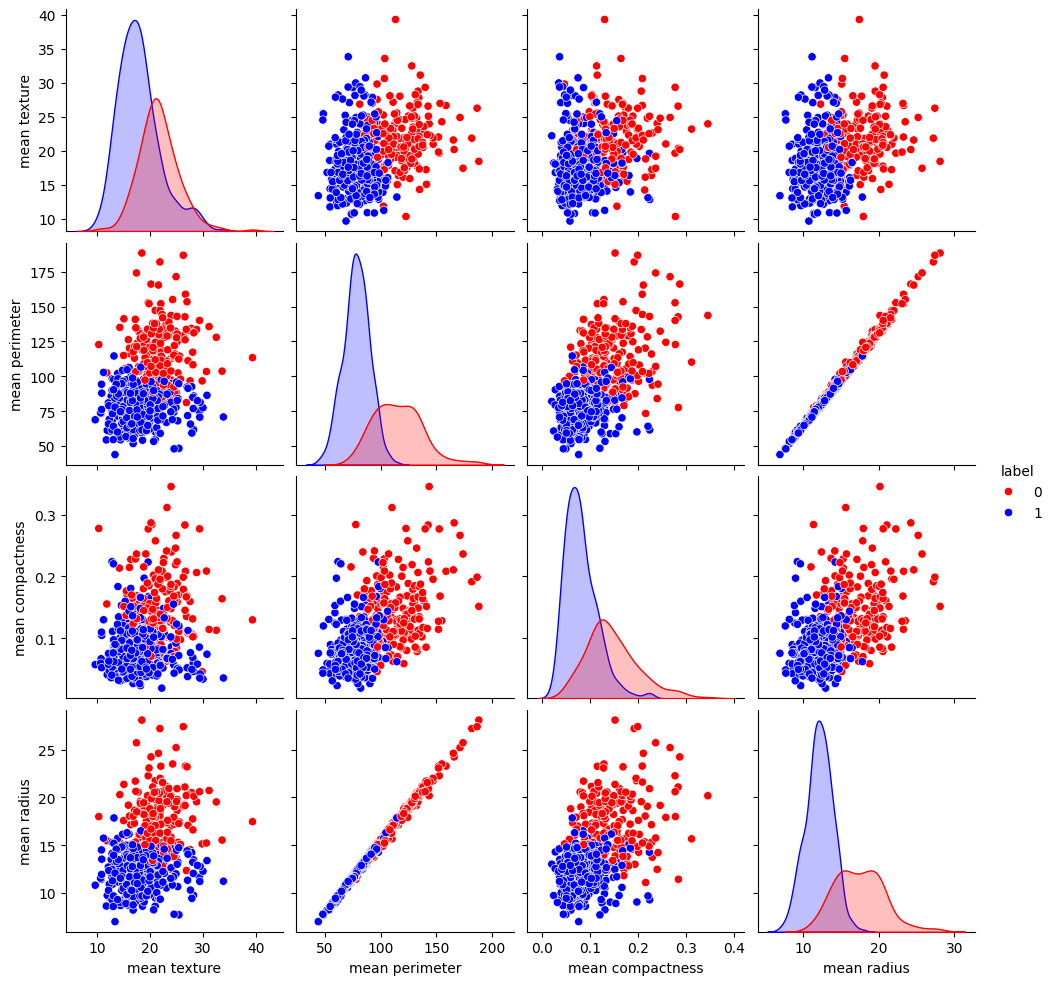

In [20]:
# Make pairwise scatterplots of 'mean texture', 'mean perimeter', 'mean compactness', and 'mean radius'. Do you notice that two of these features seem to be particularly correlated? Why might this be?
features = ['mean texture', 'mean perimeter', 'mean compactness', 'mean radius']
sns.pairplot(df[features + ['label']], hue='label', palette={0: 'red', 1: 'blue'})
plt.show()
print("Mean radius and mean perimeter are highly correlated. In geometry, p=2pie * r. So radius increases, perimeter increases almost linearly.")